In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt 
from pypfopt import plotting
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
assets = ['BTC-USD', 'ETH-USD', 'ADA-USD', 'LINK-USD', 'AVAX-USD', 'DOT-USD', 'CRO-USD', 'LRC-USD']

df =yf.download(assets, start="2019-01-01", end="2021-12-31", group_by = 'ticker')


[*********************100%***********************]  8 of 8 completed


In [3]:
close = pd.DataFrame()
for t in assets:
    close[t] = df[t, 'Close']

close.tail()

,BTC-USD,ETH-USD,ADA-USD,LINK-USD,AVAX-USD,DOT-USD,CRO-USD,LRC-USD
Date,,,,,,,,
2021-12-26,50809.515625,4067.328125,1.456045,23.009712,115.214828,31.332836,0.625890,2.351591
2021-12-27,50640.417969,4037.547607,1.512913,22.982037,113.598618,30.908672,0.624088,2.258802
2021-12-28,47588.855469,3800.893066,1.402264,20.391455,107.215614,27.907103,0.566971,2.058290
2021-12-29,46444.710938,3628.531738,1.330814,19.702854,102.998123,26.744373,0.546568,1.964071
2021-12-30,47178.125000,3713.852051,1.360415,19.970343,101.928276,27.567789,0.553711,1.997073


In [4]:
filtered = close[close.index>= '2020-09-23']
filtered.head()

,BTC-USD,ETH-USD,ADA-USD,LINK-USD,AVAX-USD,DOT-USD,CRO-USD,LRC-USD
Date,,,,,,,,
2020-09-23,10246.186523,321.116302,0.076763,7.702259,4.118469,4.031415,0.147678,0.212135
2020-09-24,10760.066406,349.355591,0.082817,9.817477,4.566561,4.381973,0.154740,0.222902
2020-09-25,10692.716797,352.183258,0.096845,10.711364,4.712279,4.420954,0.154029,0.222690
2020-09-26,10750.723633,355.488098,0.095564,10.341659,4.539249,4.347662,0.154400,0.225680
2020-09-27,10775.269531,357.438507,0.101287,10.769080,4.625536,4.310281,0.154591,0.206521


In [5]:
mu = mean_historical_return(filtered)
S = CovarianceShrinkage(filtered).ledoit_wolf()

In [18]:
ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
ef_copy = EfficientFrontier(mu, S, weight_bounds=(0,1))


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

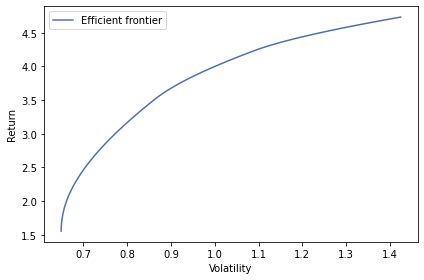

In [19]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

In [20]:
weights = ef_copy.max_sharpe()
cleaned_weights = ef_copy.clean_weights()
print(cleaned_weights)

OrderedDict([('BTC-USD', 0.0), ('ETH-USD', 0.37894), ('ADA-USD', 0.36621), ('LINK-USD', 0.0), ('AVAX-USD', 0.25484), ('DOT-USD', 0.0), ('CRO-USD', 0.0), ('LRC-USD', 0.0)])


In [21]:
ef.portfolio_performance(verbose=True)

Expected annual return: 473.4%
Annual volatility: 142.5%
Sharpe Ratio: 3.31


(4.734211424616295, 1.4245336675696452, 3.309301515252407)

In [22]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(filtered)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
print(allocation)

{'ETH-USD': 2, 'ADA-USD': 5384, 'AVAX-USD': 51}
